In [ ]:
import numpy as np
import matplotlib.pyplot as plt

datafile = '/Users/georgeau/Desktop/research_data/local_macbook/intermediate_transporter/20220126_183359_intermediate_transporter/DEBUG_intermediate_transporter_20220126_183359_data.csv'

D = np.loadtxt(f'{datafile}', delimiter=',', skiprows=1, usecols=[1,2,3,4,5,6,7,8,9,10,11,12]).T  # load data from file

In [ ]:
n_walkers = 50
n_dim = np.shape(D)[0]
n_steps = int(1e4)
labels = [
    'rxn2_k1',
    'rxn2_k2',
    'rxn3_k1',
    'rxn3_k2',
    'rxn4_k1',
    'rxn4_k2',
    'rxn6_k1',
    'rxn6_k2',
    'rxn11_k1',
    'rxn11_k2',
    'rxn12_k1',
    'sigma'
]

s=0
sigma_ref = 1e-13
k_H_on = np.log10(1e10)
k_H_off = np.log10(1e3)
k_S_on = np.log10(1e7)
k_S_off = np.log10(1e3)
k_conf = np.log10(1e2)

k_conf_range = (-1-s,5)
k_H_on_range = (7-s,13)
k_H_off_range = (0-s,6)
k_S_on_range = (4-s,10)
k_S_off_range = (0-s,6)
# sigma_range = (np.log10(5e-14,5e-13))
sigma_range = ((1e-13 - (1e-13*0.5)), (1e-13 + (1e-13*0.5)))


### boundary ranges
bounds=[0]*n_dim

# rxn2: OF + $H_out -> OF_Hb; vol*(rxn2_k1*OF*H_out - rxn2_k2*OF_Hb)
bounds[0] = k_H_on_range # rxn2_k1
bounds[1] = k_H_off_range  # rxn2_k2

# rxn3: OF_Sb -> OF + $S_out; vol*(rxn3_k1*OF_Sb - rxn3_k2*OF*S_out)
bounds[2] = k_S_off_range  # rxn3_k1
bounds[3] = k_S_on_range # rxn3_k2

# rxn4: OF_Hb -> IF_Hb; vol*(rxn4_k1*OF_Hb - rxn4_k2*IF_Hb)
bounds[4] = k_conf_range # rxn4_k1
bounds[5] = k_conf_range # rxn4_k2

# rxn6: IF_Sb -> OF_Sb; vol*(rxn6_k1*IF_Sb - rxn6_k2*OF_Sb)
bounds[6] = k_conf_range # rxn6_k1
bounds[7] = k_conf_range # rxn6_k2

# rxn11: IF_Hb + S_in -> IF_Hb_Sb; vol*(rxn11_k1*IF_Hb*S_in - rxn11_k2*IF_Hb_Sb)
bounds[8] = k_S_on_range  # rxn11_k1
bounds[9] = k_S_off_range   # rxn11_k2    

# rxn12: IF_Hb_Sb -> IF_Sb + H_in; vol*(rxn12_k1*IF_Hb_Sb - rxn12_k2*IF_Sb*H_in)
bounds[10] = k_H_off_range  # rxn12_k1
# bounds[11] = k_H_on_range  # rxn12_k2    

# experimental noise
bounds[11] = sigma_range # sigma  


# # rxn9
# bounds[11] = k_H_off_range
# bounds[12] = k_H_on_range

# # rxn10
# bounds[13] = k_S_on_range
# bounds[14] = sigma_range # sigma  
print(bounds)


### reference values
p_ref = np.zeros(n_dim)

# rxn2: OF + $H_out -> OF_Hb; vol*(rxn2_k1*OF*H_out - rxn2_k2*OF_Hb)
p_ref[0] = k_H_on_range[0] # rxn2_k1
p_ref[1] = k_H_off_range[0]  # rxn2_k2

# rxn3: OF_Sb -> OF + $S_out; vol*(rxn3_k1*OF_Sb - rxn3_k2*OF*S_out)
p_ref[2] = k_S_off_range[0]  # rxn3_k1
p_ref[3] = k_S_on_range[0] # rxn3_k2

# rxn4: OF_Hb -> IF_Hb; vol*(rxn4_k1*OF_Hb - rxn4_k2*IF_Hb)
p_ref[4] = k_conf_range[0] # rxn4_k1
p_ref[5] = k_conf_range[0] # rxn4_k2

# rxn6: IF_Sb -> OF_Sb; vol*(rxn6_k1*IF_Sb - rxn6_k2*OF_Sb)
p_ref[6] = k_conf_range[0] # rxn6_k1
p_ref[7] = k_conf_range[0] # rxn6_k2

# rxn11: IF_Hb + S_in -> IF_Hb_Sb; vol*(rxn11_k1*IF_Hb*S_in - rxn11_k2*IF_Hb_Sb)
p_ref[8] = k_S_on_range[0] # rxn11_k1
p_ref[9] = k_S_off_range[0]   # rxn11_k2    

# rxn12: IF_Hb_Sb -> IF_Sb + H_in; vol*(rxn12_k1*IF_Hb_Sb - rxn12_k2*IF_Sb*H_in)
p_ref[10] = k_H_off_range[0] # rxn12_k1
# p_ref[11] = k_H_on_range[0]  # rxn12_k2    

## rxn9
#p_ref[11] = k_H_off_range[0]
#p_ref[12] = k_H_on_range[0]

## rxn10
#p_ref[13] = k_S_on_range[0]

# experimental noise
p_ref[11] = sigma_range[0] # sigma
# p_ref[14] = sigma_range[0] # sigma

p_ref[0] = k_H_on
p_ref[1] = k_H_off
p_ref[2] = k_S_off
p_ref[3] = k_S_on
p_ref[4] = k_conf
p_ref[5] = k_conf
p_ref[6] = k_conf
p_ref[7] = k_conf
p_ref[8] = k_S_on
p_ref[9] = k_S_off
p_ref[10] = k_H_off
#p_ref[11] = k_H_on
p_ref[11] = sigma_ref
#p_ref[14] = sigma_ref
print(p_ref)



fig, axes = plt.subplots(n_dim, figsize=(20, 15), sharex=True)

for i in range(n_dim):
    ax = axes[i]
  
    #ax.plot(D[i][0:n_steps], "k", alpha=0.3)
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.set_ylim(bounds[i])
    
    for j in range(n_walkers):
        ax.plot(D[i][j*n_steps:((j+1)*n_steps)-1], "k", alpha=0.05)
    #ax.plot(D[i][0:n_steps])
    ax.axhline(p_ref[i], linestyle='--', color='red', alpha=0.7)


In [ ]:
datafile2 = ('/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/scripts/emcee_intermediate_transporter_data_2stage_2ph.csv')
y_obs = np.loadtxt(f'{datafile2}', delimiter=',', skiprows=1, usecols=1).tolist()  # load data from file
plt.figure(figsize=(15,10))
plt.plot(y_obs)
plt.title('synthetic electrophysiology trace - combined experiments')
plt.ylabel('flux')
plt.xlabel('t')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

datafile = '/Users/georgeau/Desktop/research_data/local_macbook/intermediate_transporter/20220125_182048_intermediate_transporter/DEBUG_intermediate_transporter_20220125_182048_data.csv'

D = np.loadtxt(f'{datafile}', delimiter=',', skiprows=1, usecols=[1,2,3,4,5,6,7,8,9,10,11,12,13]) # load data from file

print('synthetic model')
max_logl_synth = 9152.388064207305
p_synth = [1.e+01, 3.e+00, 3.e+00, 7.e+00, 2.e+00, 2.e+00, 2.e+00, 2.e+00, 7.e+00, 3.e+00,
 3.e+00, 1.e-13]
print(max_logl_synth)
print(p_synth)
print('\n')


print('sampled dataset')

max_logl_sample = np.max(np.transpose(D)[12])
max_logl_sample_idx = np.argmax(np.transpose(D)[12])
p_max_logl_sample = D[max_logl_sample_idx][:-1]

print(max_logl_sample)
print(max_logl_sample_idx)
print(p_max_logl_sample)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

datafile = '/Users/georgeau/Desktop/research_data/local_macbook/intermediate_transporter/20220126_183359_intermediate_transporter/DEBUG_intermediate_transporter_20220126_183359_data.csv'


### Nested sampling

In [ ]:
import dynesty as dyn
import numpy as np
import tellurium as te
import matplotlib.pyplot as plt

seed = 42
rng = np.random.default_rng(seed)


##### model configuration
print('model configuration...')
with open("antiporter_12D_model.txt", "r") as f:
    antimony_string_SS = f.read()


m = te.loada(antimony_string_SS)
m.integrator.absolute_tolerance = 1e-18
m.integrator.relative_tolerance = 1e-12
m.H_out = 5e-8

D1 = m.simulate(0, 5, 125, selections=['time', 'rxn4'])
y_true = D1['rxn4'][1:]  # remove first point

noise_stdev_true = 1e-13
y_obs = np.genfromtxt("data_grid_test3_1exp_v2.csv")
# y_obs = y_true + np.random.normal(0, noise_stdev_true, np.size(y_true))
# np.savetxt("data_grid_test3_1exp_v2.csv", y_obs)

plt.figure(figsize=(10,10))
plt.plot(y_obs, 'o', alpha=0.5)
plt.plot(y_true)
plt.ylim(-2.5e-11, 2.5e-11)
plt.ylabel('y')
plt.xlabel('t')
plt.show()
#plt.savefig('test.png')

In [ ]:
def calc_log_like(K):
    """calculates log likelihood for 12D ODE reaction system using data w/ Gaussian noise and unknown stdev"""
    def calc_norm_log_like(mu,sigma,X):
        # Normal log-likelihood function: -[(n/2)ln(2pp*sigma^2)]-[sum((X-mu)^2)/(2*sigma^2)]
        # ref: https://www.statlect.com/fundamentals-of-statistics/normal-distribution-maximum-likelihood 
        n = len(X)
        f1 = -1*(n/2)*np.log(2*np.pi*sigma**2)
        f2_a = -1/(2*sigma**2)
        f2_b = 0 
        for i in range(n):
            f2_b += (X[i]-mu[i])**2
        f2 = f2_a*f2_b
        log_likelihood = f1+f2
        return log_likelihood

    m.resetToOrigin()
    m.H_out = 5e-8
    m.integrator.absolute_tolerance = 1e-18
    m.integrator.relative_tolerance = 1e-12
    m.k1_f = 10**K[0]
    m.k1_r = 10**K[1]
    m.k2_f = 10**K[2]
    m.k2_r = 10**K[3]
    m.k3_f = 10**K[4]
    m.k3_r = 10**K[5]
    m.k4_f = 10**K[6]
    m.k4_r = 10**K[7]
    m.k5_f = 10**K[8]
    m.k5_r = 10**K[9]
    m.k6_f = 10**K[10]
    m.k6_r = (m.k1_f*m.k2_f*m.k3_f*m.k4_f*m.k5_f*m.k6_f)/(m.k1_r*m.k2_r*m.k3_r*m.k4_r*m.k5_r)
    try:
        # D_tmp = m.simulate(0, 10, 250, selections=['time', 'rxn4'])
        D_tmp = m.simulate(0, 5, 125, selections=['time', 'rxn4'])
        y_tmp = D_tmp['rxn4'][1:]  # remove first point
        sigma = 10**K[11]
        log_like = calc_norm_log_like(y_tmp,sigma,y_obs)
    except:
        log_like = -np.inf # or some other very large negative number (~p=0)
    return log_like


def calc_prior_transform(u):
    """ Transforms Uniform [0., 1.) to priors of interest
        e.g. u=0 --> X_min, u=1-->x_max
    """
    x = [
        6*u[0]+6,
        6*u[1]-1,
        6*u[2]-2,
        6*u[3]-2,
        6*u[4]+3,
        6*u[5]-1,
        6*u[6]-1,
        6*u[7]+6,
        6*u[8]-2,
        6*u[9]-2,
        6*u[10]-1,
        -1*((np.log10(5e-13)-np.log10(5e-14))*u[11]-np.log10(5e-13))
    ]
    return x
    
n_dim = 12
k_true = [10.0,3.0,2.0,2.0,7.0,3.0,3.0,10.0,2.0,2.0,3.0,-13.0]
assert(len(k_true)==n_dim)
u_ref = [0.6667,0.6667,0.6667,0.6667,0.6667,0.6667,0.6667,0.6667,0.6667,0.6667,0.6667,0.6667,]
u_0 = [0 for _ in range(n_dim)]
u_1= [1 for _ in range(n_dim)]
assert(abs(calc_log_like(k_true)-calc_log_like(calc_prior_transform(u_ref))) < 1.0 )  # check ref; transformed ref

print(calc_prior_transform(u_0))
print(calc_prior_transform(u_1))
print(k_true)
print(calc_prior_transform(u_ref))
print(calc_log_like(k_true))
print(calc_log_like(calc_prior_transform(u_ref)))
print()

In [ ]:
import time
t0 = time.time()

dsampler = dyn.DynamicNestedSampler(calc_log_like, calc_prior_transform, n_dim, nlive=250)
#dsampler.run_nested(dlogz_init=0.5, n_effective=30000, print_progress=True)
dsampler.run_nested(dlogz_init=0.5)
t1 = time.time()
dresults = dsampler.results
wall_clock = t1-t0
print(f"wall clock: {wall_clock} s <--> {wall_clock/60.0} m <--> {wall_clock/3600.0} hr)")

In [ ]:
dresults.summary()
# 5000 particles
# niter: 177052
# ncall: 5113983
# eff(%):  3.462
# logz: 3512.130 +/-  0.070
# ~62 min


In [ ]:
from dynesty import plotting as dyplot
fig, axes = dyplot.traceplot(dresults, truths=k_true,
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True,
                             connect_highlight=range(5))
plt.savefig('nested_traceplot.png')

In [ ]:
import pickle

a = dresults

with open('nested_results.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('nested_results.pickle', 'rb') as handle:
    b = pickle.load(handle)

b.summary()

In [ ]:
# see ref: https://dynesty.readthedocs.io/en/stable/index.html

import dynesty as dyn
from dynesty import plotting as dyplot

def prior_transform(u):
    """Transforms the uniform random variable `u ~ Unif[0., 1.)`
    to the parameter of interest."""

    # example transform from Uniform[0,1) to Uniform[-10,10)
    #x = 2. * u - 1.  # scale and shift to [-1., 1.)
    #x *= 10.  # scale to [-10., 10.)
    return x

def log_likelihood(x):
    # log_like = your function here
    return log_like

n_dim = 1

dsampler = dyn.DynamicNestedSampler(log_likelihood, prior_transform, n_dim)  # create sampling object
dsampler.run_nested()  # run sampler
dresults = dsampler.results  # 
fig, axes = dyplot.traceplot(dresults, 
                             truth_color='black', show_titles=True,
                             trace_cmap='viridis', connect=True,
                             connect_highlight=range(5))


## analyzing data from n experiments

In [3]:
import glob
import pandas as pd
import numpy as np

In [7]:
# get data 
path_1exp =r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_17/1_exp'
path_2exp =r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_17/2_exp'
path_3exp =r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_17/3_exp'
path_4exp =r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_17/4_exp'
path_5exp =r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_17/5_exp'

fnames_1exp = glob.glob(path_1exp + "/*exp.csv")
fnames_2exp = glob.glob(path_2exp + "/*exp.csv")
fnames_3exp = glob.glob(path_3exp + "/*exp.csv")
fnames_4exp = glob.glob(path_4exp + "/*exp.csv")
fnames_5exp = glob.glob(path_5exp + "/*exp.csv")

p_info = [   
        ["log10_k1_f",6,12,10.],
        ["log10_k1_r",-1,5,3.],
        ["log10_k2_f",-2,4,2.],
        ["log10_k2_r",-2,4,2.],
        ["log10_k3_f",3,9,7.],
        ["log10_k3_r",-1,5,3.],
        ["log10_k4_f",-1,5,3.],
        ["log10_k4_r",6,12,10.],
        ["log10_k5_f",-2,4,2.],
        ["log10_k5_r",-2,4,2.],
        ["log10_k6_f",-1,5,3.],
        ["log10_sigma",np.log10(5e-14), np.log10(5e-13), -13],
    ]
p_true = [p_i[3] for p_i in p_info]
p_labels = [p[0] for p in p_info]
p_bounds = [(p[1], p[2]) for p in p_info]

dfs_1exp = [pd.read_csv(f, names=p_labels) for f in fnames_1exp]
dfs_2exp = [pd.read_csv(f, names=p_labels) for f in fnames_2exp]
dfs_3exp = [pd.read_csv(f, names=p_labels) for f in fnames_3exp]
dfs_4exp = [pd.read_csv(f, names=p_labels) for f in fnames_4exp]
dfs_5exp = [pd.read_csv(f, names=p_labels) for f in fnames_5exp]

f=r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_21/affine_ais/ais_affine_10000000i_10000w_100s_0.65t_42r_data.csv'
dfs_1exp_ais_affine = [pd.read_csv(f, names=p_labels, skiprows=1)]

In [ ]:
import matplotlib.pyplot as plt

data_list = [dfs_1exp, dfs_2exp, dfs_3exp, dfs_4exp, dfs_5exp]
data_colors = ['blue', 'green', 'orange', 'red', 'cyan']
data_labels = ['1 exp.', '2 exp.', '3 exp.', '4 exp.', '5 exp.']

fig, axs = plt.subplots(3, 4, figsize=(20,15))
for j, df_list in enumerate(data_list):
    for k, df in enumerate(df_list):
        for i, ax in enumerate(axs.flat):
            data_i = df.iloc[:, i]
            if k == 2:
                ax.hist(data_i, density=True, bins=100, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color=data_colors[j], label=data_labels[j])
                ax.legend()
            else:
                ax.hist(data_i, density=True, bins=100, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color=data_colors[j])
            ax.axvline(p_true[i], color='black', ls='--')
            ax.set_title(f"{p_labels[i]}")            
plt.tight_layout()
plt.savefig('all_experiments.png')

In [ ]:
import matplotlib.pyplot as plt

data_list = [dfs_1exp, dfs_2exp]
data_colors = ['blue', 'green', 'orange', 'red', 'cyan']
data_labels = ['1 exp.', '2 exp.', '3 exp.', '4 exp.', '5 exp.']

fig, axs = plt.subplots(3, 4, figsize=(20,15))
for j, df_list in enumerate(data_list):
    for k, df in enumerate(df_list):
        for i, ax in enumerate(axs.flat):
            data_i = df.iloc[:, i]
            if k == 2:
                ax.hist(data_i, density=True, bins=100, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color=data_colors[j], label=data_labels[j])
                ax.legend()
            else:
                ax.hist(data_i, density=True, bins=100, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color=data_colors[j])
            ax.axvline(p_true[i], color='black', ls='--')
            ax.set_title(f"{p_labels[i]}")            
plt.tight_layout()
plt.savefig('1vs2_experiments.png')

In [ ]:
import matplotlib.pyplot as plt

data_list = [dfs_1exp, dfs_2exp, dfs_4exp]
data_colors = ['blue', 'green', 'orange', 'red', 'cyan']
data_labels = ['1 exp.', '2 exp.', '4 exp.']

fig, axs = plt.subplots(3, 4, figsize=(20,15))
for j, df_list in enumerate(data_list):
    for k, df in enumerate(df_list):
        for i, ax in enumerate(axs.flat):
            data_i = df.iloc[:, i]
            if k == 2:
                ax.hist(data_i, density=True, bins=100, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color=data_colors[j], label=data_labels[j])
                ax.legend()
            else:
                ax.hist(data_i, density=True, bins=100, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color=data_colors[j])
            ax.axvline(p_true[i], color='black', ls='--')
            ax.set_title(f"{p_labels[i]}")            
plt.tight_layout()
plt.savefig('1vs2vs4_experiments.png')

## plot rmsd of sampling

Text(0.5, 1.0, 'rmsd from true values')

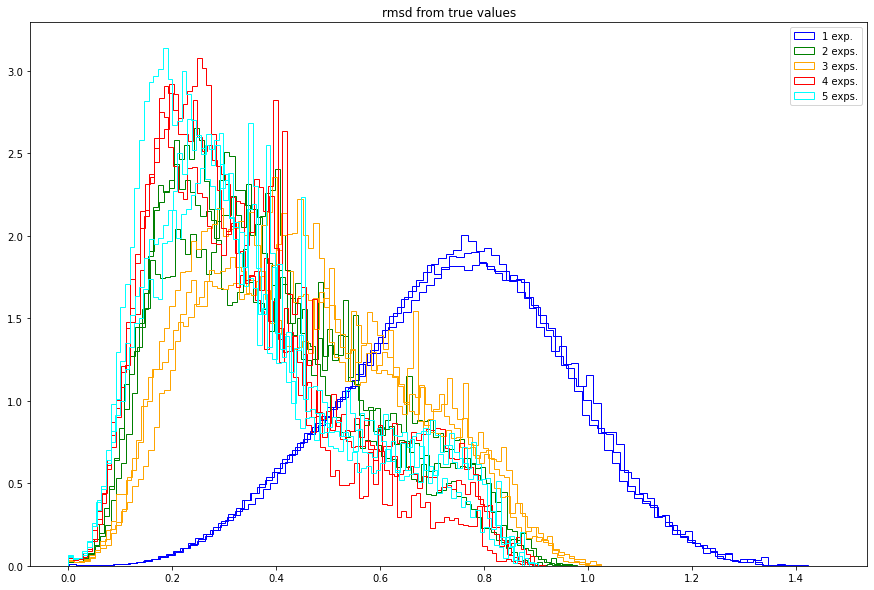

In [86]:
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt


data_list = [dfs_1exp, dfs_2exp, dfs_3exp, dfs_4exp, dfs_5exp]
data_colors = ['blue', 'green', 'orange', 'red', 'cyan']
data_labels = ['1 exp.', '2 exps.', '3 exps.', '4 exps.', '5 exps.']
#p_true_vector = np.array([p_true for i in range(len(df_tmp.values))])
p_true_vector = np.array(p_true)

plt.figure(figsize=(15,10))

for j, df_list in enumerate(data_list):
    for k, df_tmp in enumerate(df_list):
        rmse = np.sqrt(np.sum((df_tmp.values-p_true_vector)**2, axis=1)/df_tmp.shape[1])
        if k == 2:
            plt.hist(rmse, bins=100, density=True, histtype='step',color=data_colors[j],label=data_labels[j])
        else:
            plt.hist(rmse, bins=100, density=True, histtype='step',color=data_colors[j])
plt.legend()
plt.title('rmsd from true values')
      
# d = []
# for i in range(df_tmp.shape[1]):
#     d.append((np.linalg.norm(df_tmp.values[i]-p_true_vector)))
# print(d)

## investigating model identifiability vs experimental protocol

### get data and store into dataframe, get parameter info

In [4]:
# get data 
path_1exp_a =r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_17/1_exp'
path_1exp_b =r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_27/affine/1_exp_b'
path_1exp_c =r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_27/affine/1_exp_c'
path_2exp = r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_17/2_exp'

path_1exp_a =r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_17/1_exp'
path_1exp_b =r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_27/affine/1_exp_b'
path_1exp_c =r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_27/affine/1_exp_c'
path_2exp = r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_17/2_exp'

fnames_1exp_a = glob.glob(path_1exp_a + "/*exp.csv")
fnames_1exp_b = glob.glob(path_1exp_b + "/*.csv")
fnames_1exp_c = glob.glob(path_1exp_c + "/*.csv")
fnames_2exp = glob.glob(path_2exp + "/*exp.csv")


p_info = [   
        ["log10_k1_f",6,12,10.],
        ["log10_k1_r",-1,5,3.],
        ["log10_k2_f",-2,4,2.],
        ["log10_k2_r",-2,4,2.],
        ["log10_k3_f",3,9,7.],
        ["log10_k3_r",-1,5,3.],
        ["log10_k4_f",-1,5,3.],
        ["log10_k4_r",6,12,10.],
        ["log10_k5_f",-2,4,2.],
        ["log10_k5_r",-2,4,2.],
        ["log10_k6_f",-1,5,3.],
        ["log10_sigma",np.log10(5e-14), np.log10(5e-13), -13],
    ]
p_true = [p_i[3] for p_i in p_info]
p_labels = [p[0] for p in p_info]
p_bounds = [(p[1], p[2]) for p in p_info]

dfs_1exp_a = [pd.read_csv(f, names=p_labels) for f in fnames_1exp_a]
dfs_1exp_b = [pd.read_csv(f, names=p_labels) for f in fnames_1exp_b]
dfs_1exp_c = [pd.read_csv(f, names=p_labels) for f in fnames_1exp_c]
dfs_2exp = [pd.read_csv(f, names=p_labels) for f in fnames_2exp]


### plot 1d marginal posterior distributions

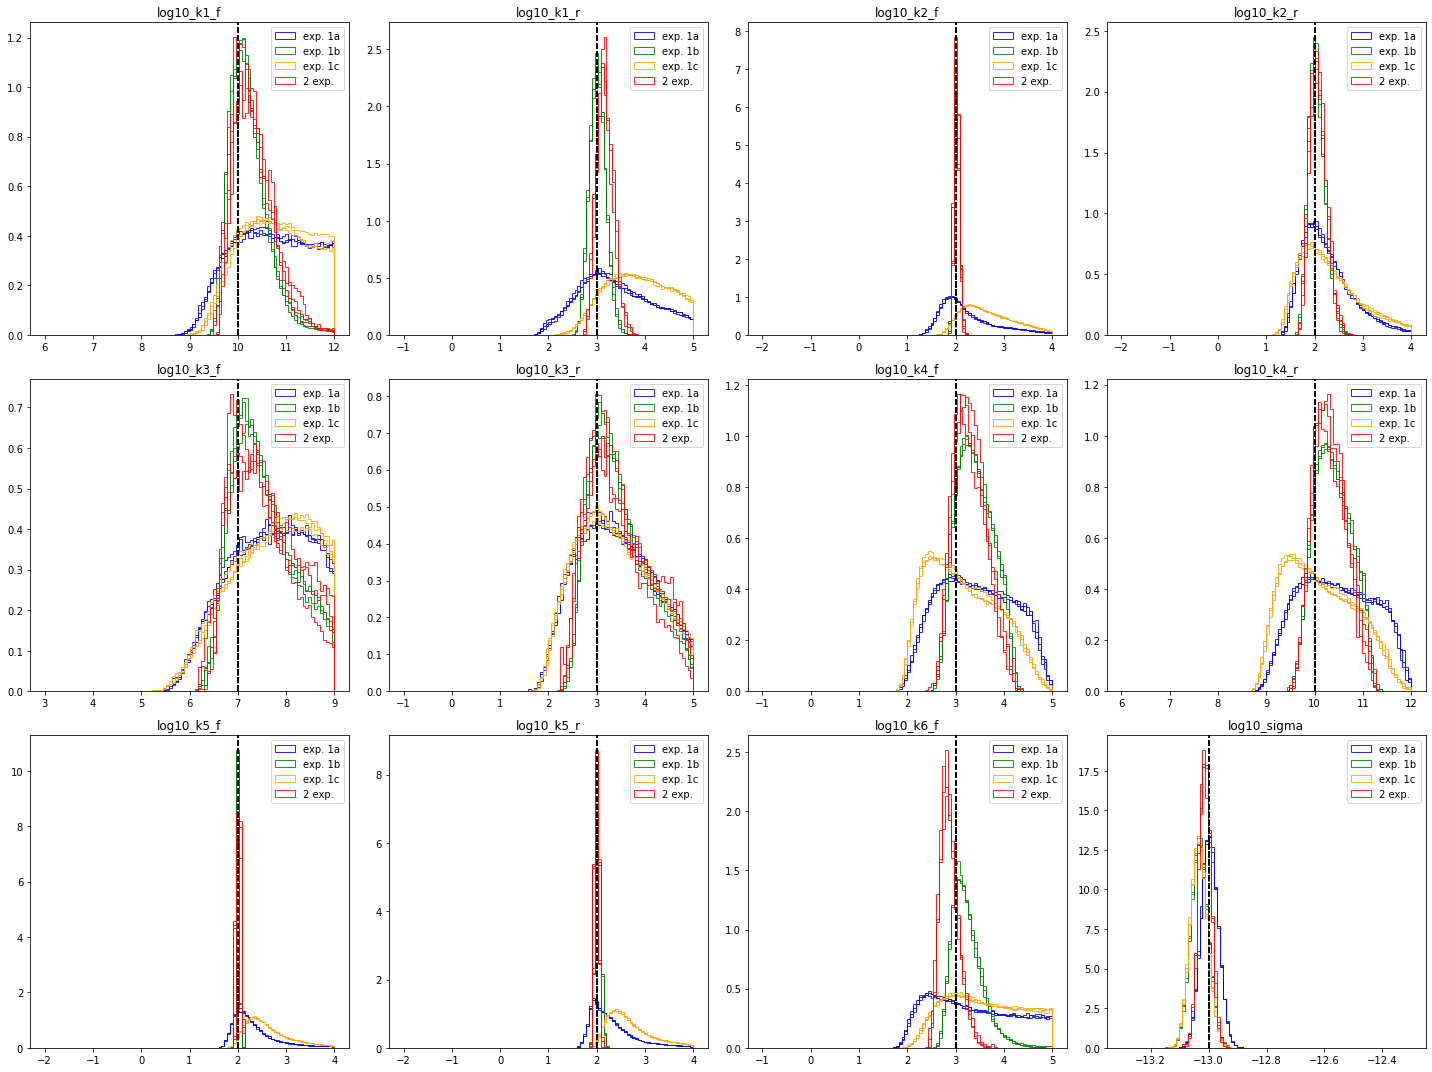

In [5]:
import matplotlib.pyplot as plt

data_list = [dfs_1exp_a, dfs_1exp_b, dfs_1exp_c, dfs_2exp]
data_colors = ['blue', 'green', 'orange', 'red', ]
data_labels = ['exp. 1a', 'exp. 1b', 'exp. 1c', '2 exp.', ]

fig, axs = plt.subplots(3, 4, figsize=(20,15))
for j, df_list in enumerate(data_list):
    for k, df in enumerate(df_list):
        for i, ax in enumerate(axs.flat):
            data_i = df.iloc[:, i]
            if k == 2:
                ax.hist(data_i, density=True, bins=100, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color=data_colors[j], label=data_labels[j])
                ax.legend()
            else:
                ax.hist(data_i, density=True, bins=100, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color=data_colors[j])
            ax.axvline(p_true[i], color='black', ls='--')
            ax.set_title(f"{p_labels[i]}")            
plt.tight_layout()
plt.savefig('experiment_comparison_dist.png')

### plot RMSD

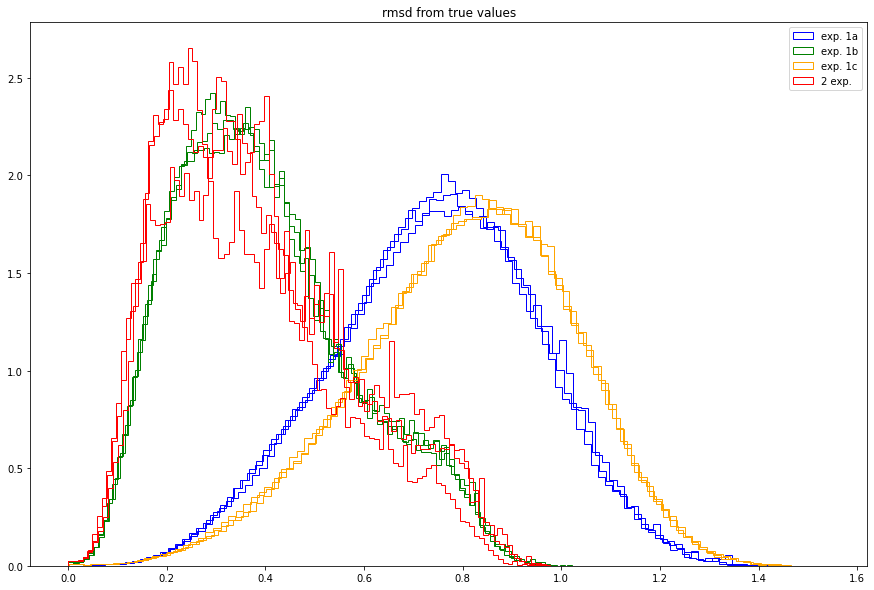

In [6]:
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt


data_list = [dfs_1exp_a, dfs_1exp_b, dfs_1exp_c, dfs_2exp]
data_colors = ['blue', 'green', 'orange', 'red', ]
data_labels = ['exp. 1a', 'exp. 1b', 'exp. 1c', '2 exp.', ]
#p_true_vector = np.array([p_true for i in range(len(df_tmp.values))])
p_true_vector = np.array(p_true)

plt.figure(figsize=(15,10))

for j, df_list in enumerate(data_list):
    for k, df_tmp in enumerate(df_list):
        rmse = np.sqrt(np.sum((df_tmp.values-p_true_vector)**2, axis=1)/df_tmp.shape[1])
        if k == 2:
            plt.hist(rmse, bins=100, density=True, histtype='step',color=data_colors[j],label=data_labels[j])
        else:
            plt.hist(rmse, bins=100, density=True, histtype='step',color=data_colors[j])
plt.legend()
plt.title('rmsd from true values')
plt.savefig('experiment_comparison_rmsd.png')

# comparing AIS + affine runs

In [10]:
# get data 
path_1exp_ais =r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_27/affine_ais'
path_2exp_ais = r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_27/affine_ais'

fnames_1exp_ais = glob.glob(path_1exp_ais + "/*data.csv")
fnames_2exp_ais = glob.glob(path_2exp_ais + "/*2exp.csv")


p_info = [   
        ["log10_k1_f",6,12,10.],
        ["log10_k1_r",-1,5,3.],
        ["log10_k2_f",-2,4,2.],
        ["log10_k2_r",-2,4,2.],
        ["log10_k3_f",3,9,7.],
        ["log10_k3_r",-1,5,3.],
        ["log10_k4_f",-1,5,3.],
        ["log10_k4_r",6,12,10.],
        ["log10_k5_f",-2,4,2.],
        ["log10_k5_r",-2,4,2.],
        ["log10_k6_f",-1,5,3.],
        ["log10_sigma",np.log10(5e-14), np.log10(5e-13), -13],
    ]
p_true = [p_i[3] for p_i in p_info]
p_labels = [p[0] for p in p_info]
p_bounds = [(p[1], p[2]) for p in p_info]

dfs_1exp_ais = [pd.read_csv(f, names=p_labels, skiprows=1) for f in fnames_1exp_ais]
dfs_2exp_ais = [pd.read_csv(f, names=p_labels, skiprows=1) for f in fnames_2exp_ais]

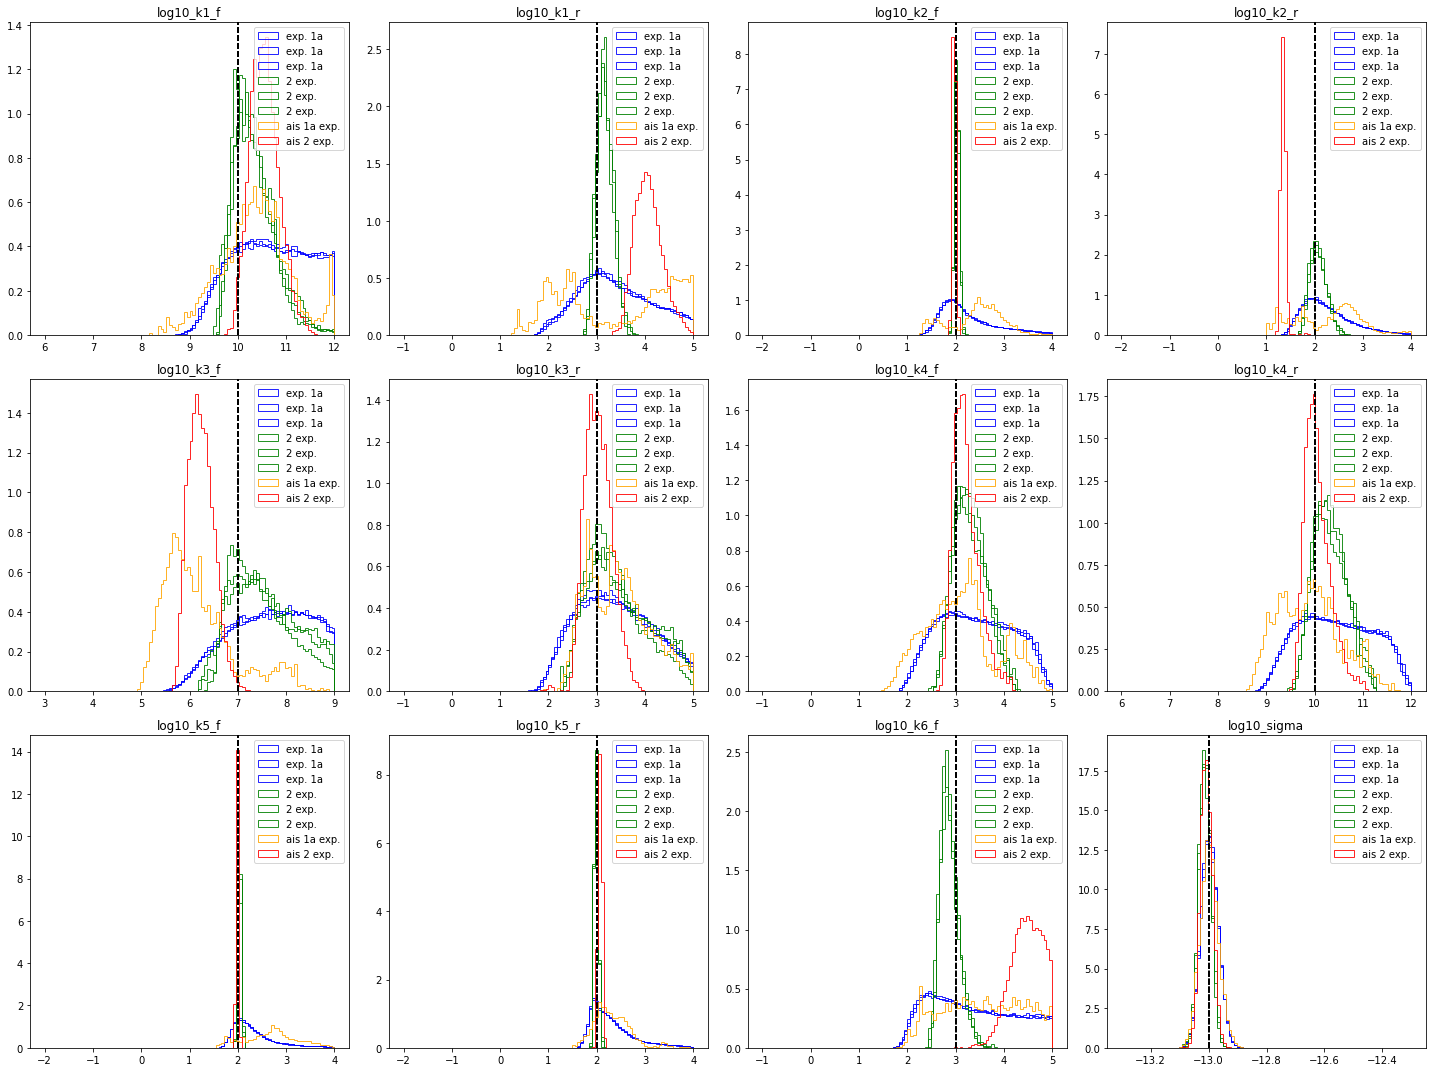

In [13]:
import matplotlib.pyplot as plt

data_list = [dfs_1exp_a, dfs_2exp, dfs_1exp_ais, dfs_2exp_ais]
data_colors = ['blue', 'green', 'orange', 'red', ]
data_labels = ['exp. 1a', '2 exp.', 'ais 1a exp.', 'ais 2 exp.']

fig, axs = plt.subplots(3, 4, figsize=(20,15))
for j, df_list in enumerate(data_list):
    for k, df in enumerate(df_list):
        for i, ax in enumerate(axs.flat):
            data_i = df.iloc[:, i]
            ax.hist(data_i, density=True, bins=100, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color=data_colors[j], label=data_labels[j])
            ax.legend()
#             if k == 2:
#                 ax.hist(data_i, density=True, bins=100, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color=data_colors[j], label=data_labels[j])
#                 ax.legend()
#             else:
#                 ax.hist(data_i, density=True, bins=100, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color=data_colors[j])
            ax.axvline(p_true[i], color='black', ls='--')
            ax.set_title(f"{p_labels[i]}")            
plt.tight_layout()
plt.savefig('ais_experiment_comparison_dist.png')

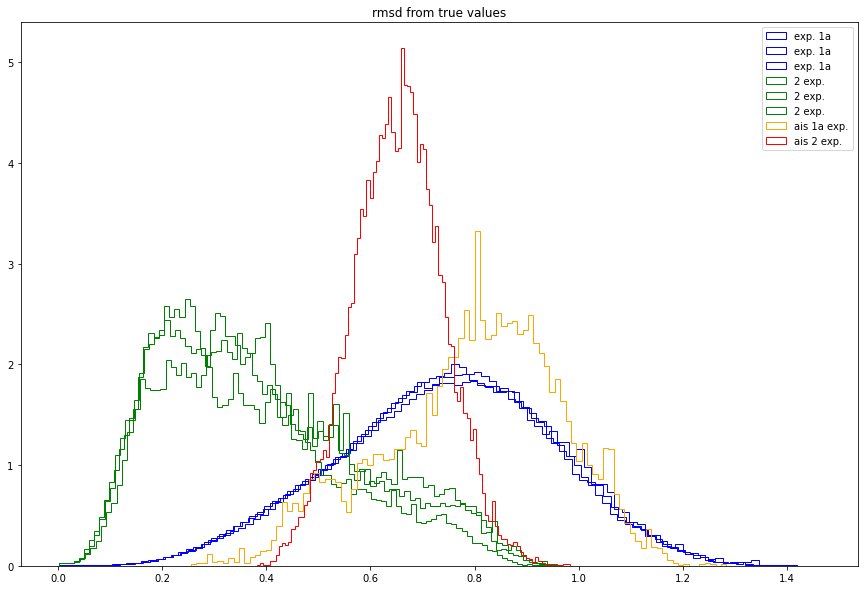

In [15]:
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt


data_list = [dfs_1exp_a, dfs_2exp, dfs_1exp_ais, dfs_2exp_ais]
data_colors = ['blue', 'green', 'orange', 'red', ]
data_labels = ['exp. 1a', '2 exp.', 'ais 1a exp.', 'ais 2 exp.']
#p_true_vector = np.array([p_true for i in range(len(df_tmp.values))])
p_true_vector = np.array(p_true)

plt.figure(figsize=(15,10))

for j, df_list in enumerate(data_list):
    for k, df_tmp in enumerate(df_list):
        rmse = np.sqrt(np.sum((df_tmp.values-p_true_vector)**2, axis=1)/df_tmp.shape[1])
        plt.hist(rmse, bins=100, density=True, histtype='step',color=data_colors[j],label=data_labels[j])
#         if k == 2:
#             plt.hist(rmse, bins=100, density=True, histtype='step',color=data_colors[j],label=data_labels[j])
#         else:
#             plt.hist(rmse, bins=100, density=True, histtype='step',color=data_colors[j])
plt.legend()
plt.title('rmsd from true values')
plt.savefig('ais_experiment_comparison_rmsd.png')

In [17]:
# get data 
path_1a_ais =r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_30/affine/1a/'
path_1b_ais = r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_30/affine/1b/'

fnames_1exp_ais = glob.glob(path_1a_ais + "/*.csv")
fnames_2exp_ais = glob.glob(path_1b_ais + "/*.csv")


p_info = [   
        ["log10_k1_f",6,12,10.],
        ["log10_k1_r",-1,5,3.],
        ["log10_k2_f",-2,4,2.],
        ["log10_k2_r",-2,4,2.],
        ["log10_k3_f",3,9,7.],
        ["log10_k3_r",-1,5,3.],
        ["log10_k4_f",-1,5,3.],
        ["log10_k4_r",6,12,10.],
        ["log10_k5_f",-2,4,2.],
        ["log10_k5_r",-2,4,2.],
        ["log10_k6_f",-1,5,3.],
        ["log10_sigma",np.log10(5e-14), np.log10(5e-13), -13],
    ]
p_true = [p_i[3] for p_i in p_info]
p_labels = [p[0] for p in p_info]
p_bounds = [(p[1], p[2]) for p in p_info]

dfs_1exp_ais = [pd.read_csv(f, names=p_labels, skiprows=1) for f in fnames_1exp_ais]
dfs_2exp_ais = [pd.read_csv(f, names=p_labels, skiprows=1) for f in fnames_2exp_ais]

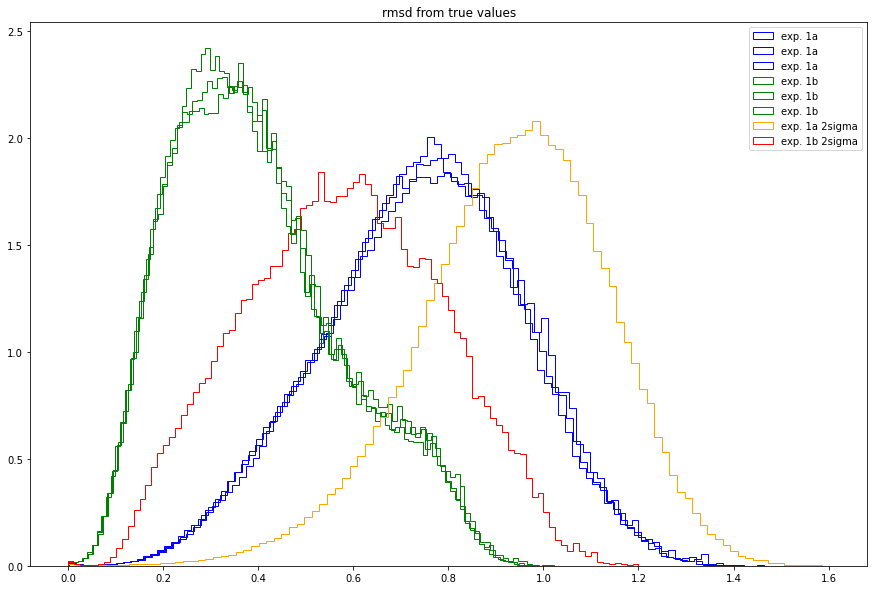

In [18]:
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt


data_list = [dfs_1exp_a, dfs_1exp_b, dfs_1exp_ais, dfs_2exp_ais]
data_colors = ['blue', 'green', 'orange', 'red', ]
data_labels = ['exp. 1a', 'exp. 1b', 'exp. 1a 2sigma', 'exp. 1b 2sigma']
#p_true_vector = np.array([p_true for i in range(len(df_tmp.values))])
p_true_vector = np.array(p_true)

plt.figure(figsize=(15,10))

for j, df_list in enumerate(data_list):
    for k, df_tmp in enumerate(df_list):
        rmse = np.sqrt(np.sum((df_tmp.values-p_true_vector)**2, axis=1)/df_tmp.shape[1])
        plt.hist(rmse, bins=100, density=True, histtype='step',color=data_colors[j],label=data_labels[j])
#         if k == 2:
#             plt.hist(rmse, bins=100, density=True, histtype='step',color=data_colors[j],label=data_labels[j])
#         else:
#             plt.hist(rmse, bins=100, density=True, histtype='step',color=data_colors[j])
plt.legend()
plt.title('rmsd from true values')
plt.savefig('ais_experiment_comparison_rmsd.png')

## plotting results

Text(0.5, 1.0, 'rmsd from true values')

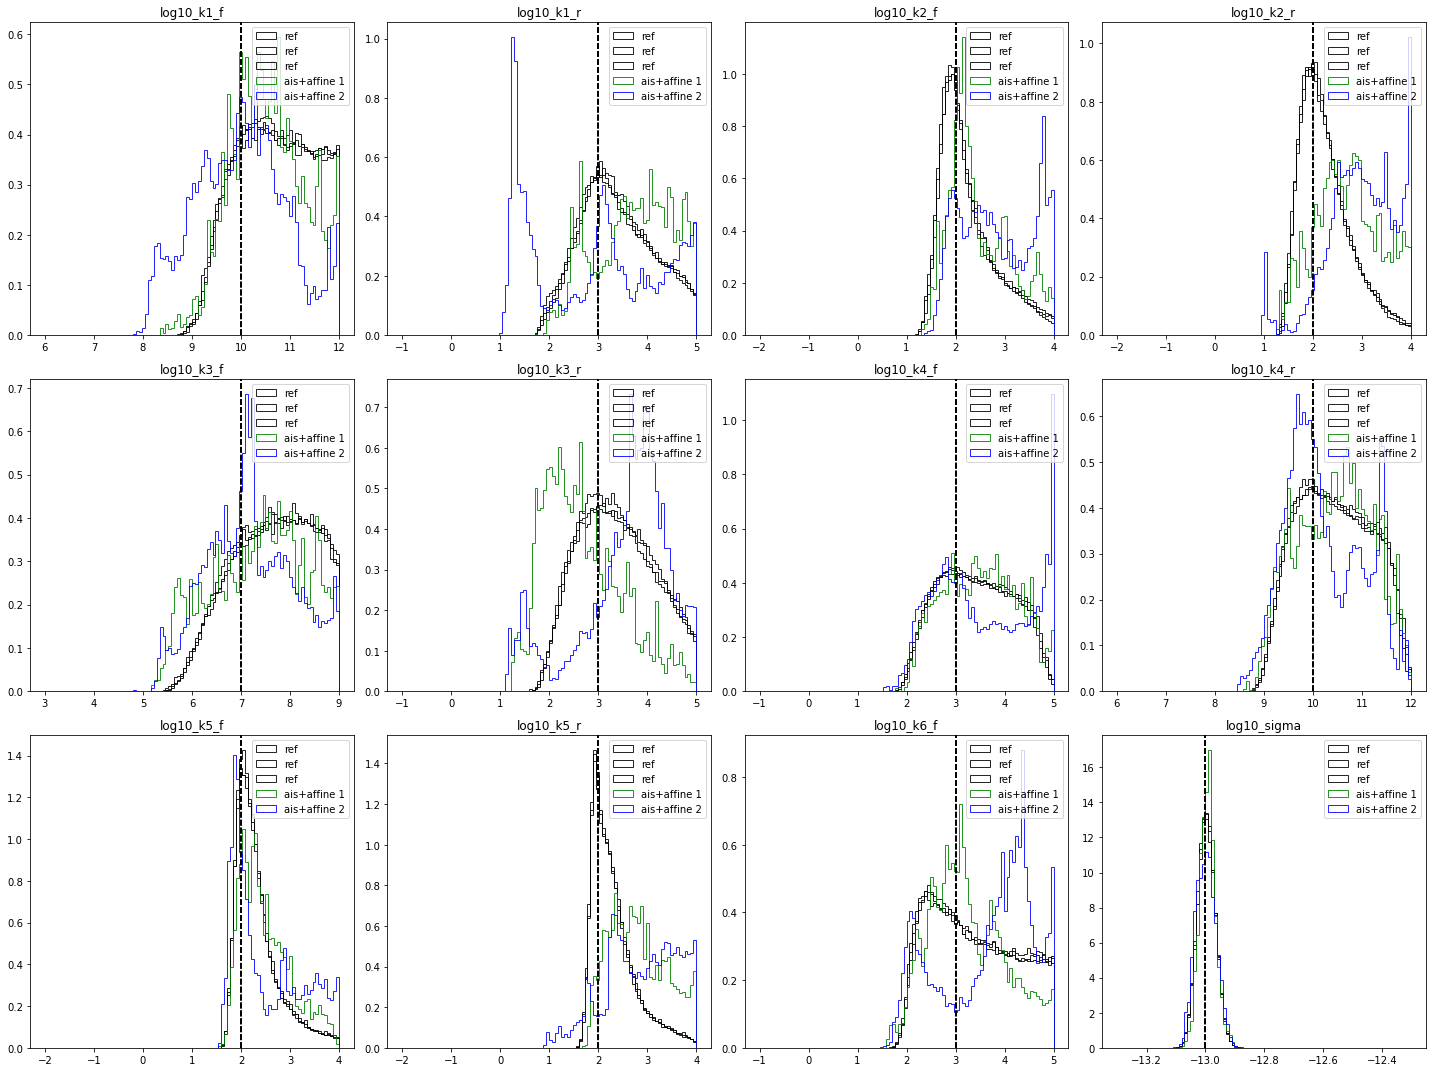

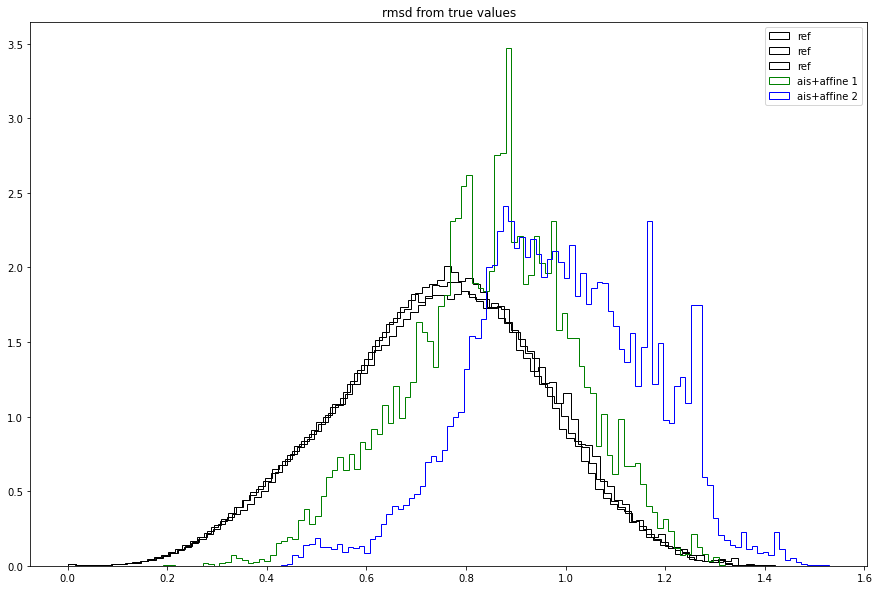

In [24]:
# get data 
f1 =r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_30/affine_ais/ais_affine_100000000i_10000w_100s_0.95t_42r_data.csv'
f2 = r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_30/affine_ais/ais_affine_10000000i_100000w_100s_0.65t_42r_data.csv'

p_info = [   
        ["log10_k1_f",6,12,10.],
        ["log10_k1_r",-1,5,3.],
        ["log10_k2_f",-2,4,2.],
        ["log10_k2_r",-2,4,2.],
        ["log10_k3_f",3,9,7.],
        ["log10_k3_r",-1,5,3.],
        ["log10_k4_f",-1,5,3.],
        ["log10_k4_r",6,12,10.],
        ["log10_k5_f",-2,4,2.],
        ["log10_k5_r",-2,4,2.],
        ["log10_k6_f",-1,5,3.],
        ["log10_sigma",np.log10(5e-14), np.log10(5e-13), -13],
    ]
p_true = [p_i[3] for p_i in p_info]
p_labels = [p[0] for p in p_info]
p_bounds = [(p[1], p[2]) for p in p_info]

df1 = [pd.read_csv(f1, names=p_labels, skiprows=1) ]
df2 = [pd.read_csv(f2, names=p_labels, skiprows=1)] 

import matplotlib.pyplot as plt

data_list = [dfs_1exp_a, df1, df2]
data_colors = ['black', 'green', 'blue' ]
data_labels = ['ref', 'ais+affine 1', 'ais+affine 2']

fig, axs = plt.subplots(3, 4, figsize=(20,15))
for j, df_list in enumerate(data_list):
    for k, df in enumerate(df_list):
        for i, ax in enumerate(axs.flat):
            data_i = df.iloc[:, i]
            ax.hist(data_i, density=True, bins=100, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color=data_colors[j], label=data_labels[j])
            ax.legend()
            ax.axvline(p_true[i], color='black', ls='--')
            ax.set_title(f"{p_labels[i]}")            
plt.tight_layout()

p_true_vector = np.array(p_true)

plt.figure(figsize=(15,10))

for j, df_list in enumerate(data_list):
    for k, df_tmp in enumerate(df_list):
        rmse = np.sqrt(np.sum((df_tmp.values-p_true_vector)**2, axis=1)/df_tmp.shape[1])
        plt.hist(rmse, bins=100, density=True, histtype='step',color=data_colors[j],label=data_labels[j])
#         if k == 2:
#             plt.hist(rmse, bins=100, density=True, histtype='step',color=data_colors[j],label=data_labels[j])
#         else:
#             plt.hist(rmse, bins=100, density=True, histtype='step',color=data_colors[j])
plt.legend()
plt.title('rmsd from true values')

# parallel shuffle AIES vs serial AIES

### load serial AIES sampling data (3 replicas)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

# get data 
# r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_17/1_exp'
path_1a =r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_17/1_exp'
path_2 = r'/Users/georgeau/Desktop/research_data/exacloud/2022_06_17/2_exp'
fnames_1exp_a = glob.glob(path_1a + "/*.csv")
fnames_2exp = glob.glob(path_2 + "/*.csv")

p_info = [   
        ["log10_k1_f",6,12,10.],
        ["log10_k1_r",-1,5,3.],
        ["log10_k2_f",-2,4,2.],
        ["log10_k2_r",-2,4,2.],
        ["log10_k3_f",3,9,7.],
        ["log10_k3_r",-1,5,3.],
        ["log10_k4_f",-1,5,3.],
        ["log10_k4_r",6,12,10.],
        ["log10_k5_f",-2,4,2.],
        ["log10_k5_r",-2,4,2.],
        ["log10_k6_f",-1,5,3.],
        ["log10_sigma",np.log10(5e-14), np.log10(5e-13), -13],
]
p_true = [p_i[3] for p_i in p_info]
p_labels = [p[0] for p in p_info]
p_bounds = [(p[1], p[2]) for p in p_info]

dfs_1exp_a = [pd.read_csv(f, names=p_labels, skiprows=1) for f in fnames_1exp_a]
dfs_2exp = [pd.read_csv(f, names=p_labels, skiprows=1) for f in fnames_2exp]

print(p_true)

[10.0, 3.0, 2.0, 2.0, 7.0, 3.0, 3.0, 10.0, 2.0, 2.0, 3.0, -13]


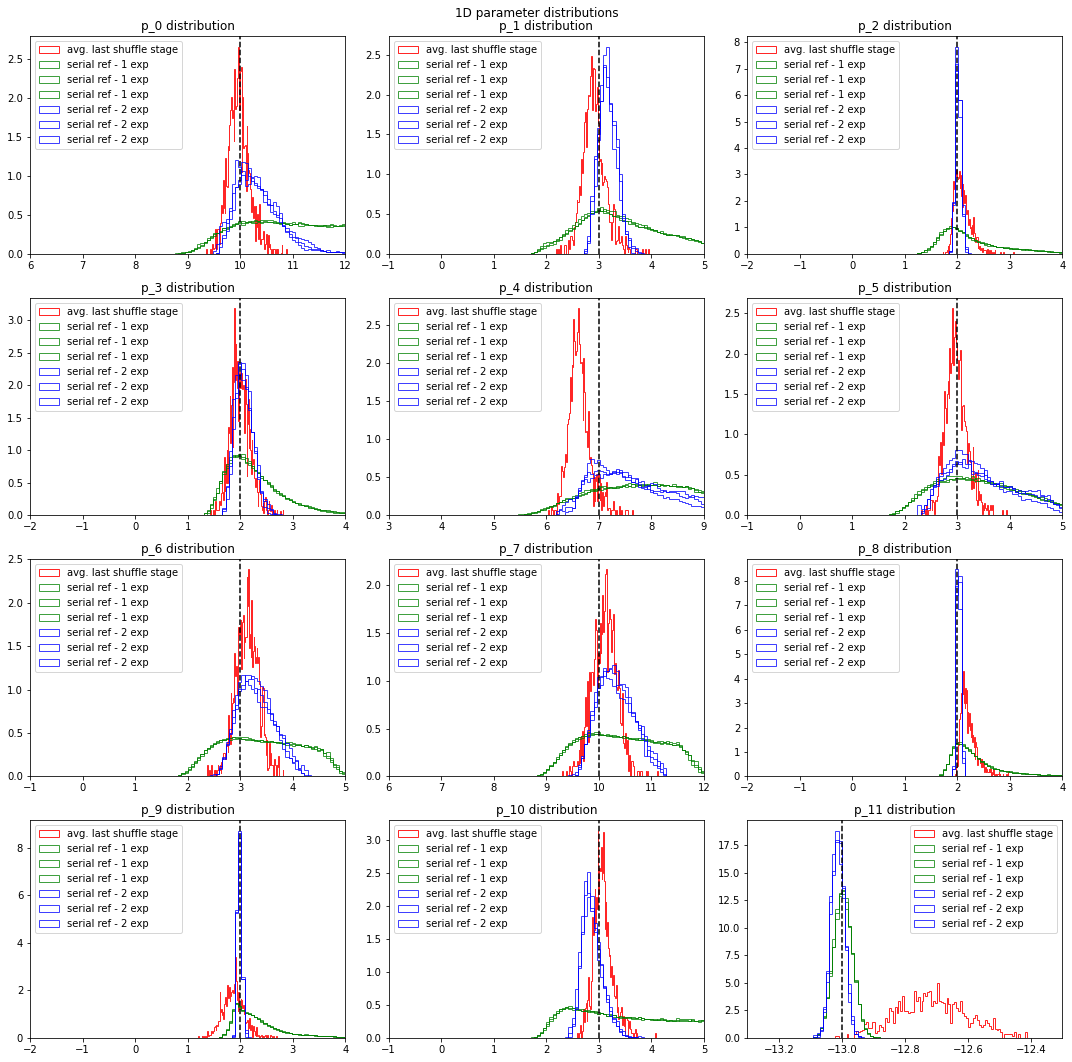

In [25]:
import pandas as pd
import numpy as np
import pickle

n_ensembles = 6
n_shuffles = 1000

# get data 
f1 =r'/Users/georgeau/OneDrive - Oregon Health & Science University/research_code/Bayesian_transporter_archive/test_parallel2.pickle'

with open (f1, 'rb') as fp:
    sample_list = pickle.load(fp)

n_bins = 100
fig, axs = plt.subplots(4,3, figsize=(15,15))

### shuffled samples
k=-1
tmp = sample_list[k]
for i, ax in enumerate(axs.flatten()):  # for each subplot figure (parameter)
    s = np.array(0.0)
    n = np.array(0.0)
    for j in range(n_ensembles):
        D_tmp = np.transpose(tmp[j])[i]
        s = s + D_tmp
    avg = s/n_ensembles 
    ax.hist(avg, n_bins, histtype="step", density=True, alpha=0.85, color='red', label='avg. last shuffle stage')   # plot parameter histogram
    ax.legend()
    ax.set_title(f'p_{i} distribution')
    ax.set_xlim(p_bounds[i][0], p_bounds[i][1])
    ax.axvline(p_true[i], 0,1, ls='--', color='k')

data_list = [dfs_1exp_a]   
for j, df_list in enumerate(data_list):
    for k, df in enumerate(df_list):
        for i, ax in enumerate(axs.flat):
            data_i = df.iloc[:, i]
            ax.hist(data_i, density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.75, histtype='step', color='green', label='serial ref - 1 exp')
            ax.legend()
    

data_list2 = [dfs_2exp]   
for j, df_list in enumerate(data_list2):
    for k, df in enumerate(df_list):
        for i, ax in enumerate(axs.flat):
            data_i = df.iloc[:, i]
            ax.hist(data_i, density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.75, histtype='step', color='blue', label='serial ref - 2 exp')
            ax.legend()
    
    
    
plt.suptitle('1D parameter distributions')
plt.tight_layout()
# plt.savefig(f'{out_fname}.png')
# plt.close()
    
# p_info = [   
#         ["log10_k1_f",6,12,10.],
#         ["log10_k1_r",-1,5,3.],
#         ["log10_k2_f",-2,4,2.],
#         ["log10_k2_r",-2,4,2.],
#         ["log10_k3_f",3,9,7.],
#         ["log10_k3_r",-1,5,3.],
#         ["log10_k4_f",-1,5,3.],
#         ["log10_k4_r",6,12,10.],
#         ["log10_k5_f",-2,4,2.],
#         ["log10_k5_r",-2,4,2.],
#         ["log10_k6_f",-1,5,3.],
#         ["log10_sigma",np.log10(5e-14), np.log10(5e-13), -13],
#     ]
# p_true = [p_i[3] for p_i in p_info]
# p_labels = [p[0] for p in p_info]
# p_bounds = [(p[1], p[2]) for p in p_info]

# df1 = [pd.read_csv(f1, names=p_labels, skiprows=1) ]
# df2 = [pd.read_csv(f2, names=p_labels, skiprows=1)] 

# import matplotlib.pyplot as plt

# data_list = [dfs_1exp_a, df1, df2]
# data_colors = ['black', 'green', 'blue' ]
# data_labels = ['ref', 'ais+affine 1', 'ais+affine 2']

# fig, axs = plt.subplots(3, 4, figsize=(20,15))
# for j, df_list in enumerate(data_list):
#     for k, df in enumerate(df_list):
#         for i, ax in enumerate(axs.flat):
#             data_i = df.iloc[:, i]
#             ax.hist(data_i, density=True, bins=100, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color=data_colors[j], label=data_labels[j])
#             ax.legend()
#             ax.axvline(p_true[i], color='black', ls='--')
#             ax.set_title(f"{p_labels[i]}")            
# plt.tight_layout()



Text(0.5, 1.0, 'rmsd from true values (log10 parameter space)')

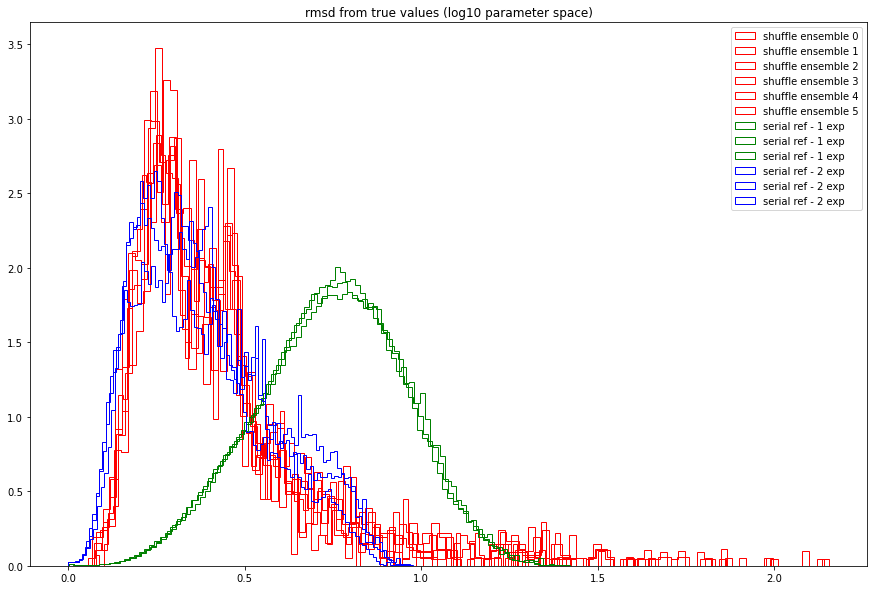

In [46]:
p_true_vector = np.array(p_true)

plt.figure(figsize=(15,10))


k=-1
tmp = sample_list[k]
df1 = pd.DataFrame(tmp[0])
df2 = pd.DataFrame(tmp[1])
df3 = pd.DataFrame(tmp[2])
df4 = pd.DataFrame(tmp[3])
df5 = pd.DataFrame(tmp[4])
df6 = pd.DataFrame(tmp[5])

df_list = [df1, df2, df3, df4, df5, df6]

for i, df_tmp in enumerate(df_list):
    rmse = np.sqrt(np.sum((df_tmp.values-p_true_vector)**2, axis=1)/df_tmp.shape[1])
    plt.hist(rmse, bins=100, density=True, histtype='step',color='red',label=f'shuffle ensemble {i}')


for j, df_list in enumerate(data_list):
    for k, df_tmp in enumerate(df_list):
        rmse = np.sqrt(np.sum((df_tmp.values-p_true_vector)**2, axis=1)/df_tmp.shape[1])
        plt.hist(rmse, bins=100, density=True, histtype='step',color='green',label='serial ref - 1 exp')
        
for j, df_list2 in enumerate(data_list2):
    for k, df_tmp in enumerate(df_list2):
        rmse = np.sqrt(np.sum((df_tmp.values-p_true_vector)**2, axis=1)/df_tmp.shape[1])
        plt.hist(rmse, bins=100, density=True, histtype='step',color='blue',label='serial ref - 2 exp')
        

        
#         if k == 2:
#             plt.hist(rmse, bins=100, density=True, histtype='step',color=data_colors[j],label=data_labels[j])
#         else:
#             plt.hist(rmse, bins=100, density=True, histtype='step',color=data_colors[j])
plt.legend()
plt.title('rmsd from true values (log10 parameter space)')

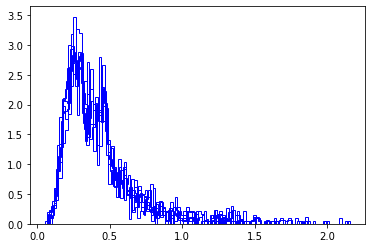

In [44]:
k=-1
tmp = sample_list[k]
df1 = pd.DataFrame(tmp[0])
df2 = pd.DataFrame(tmp[1])
df3 = pd.DataFrame(tmp[2])
df4 = pd.DataFrame(tmp[3])
df5 = pd.DataFrame(tmp[4])
df6 = pd.DataFrame(tmp[5])

df_list = [df1, df2, df3, df4, df5, df6]

for i, df_tmp in enumerate(df_list):
    rmse = np.sqrt(np.sum((df_tmp.values-p_true_vector)**2, axis=1)/df_tmp.shape[1])
    plt.hist(rmse, bins=100, density=True, histtype='step',color='blue',label=f'shuffle ensemble {i}')


In [1]:
import pandas as pd
import numpy as np
import pickle

n_ensembles = 6
n_shuffles = 1000

# get data 
f1 =r'/Users/georgeau/OneDrive - Oregon Health & Science University/research_code/Bayesian_transporter_archive/test_parallel_long_1.pickle'

with open (f1, 'rb') as fp:
    sample_list = pickle.load(fp)

n_bins = 100
fig, axs = plt.subplots(4,3, figsize=(15,15))

### shuffled samples
k=-1
tmp = sample_list[k]
for i, ax in enumerate(axs.flatten()):  # for each subplot figure (parameter)
    s = np.array(0.0)
    n = np.array(0.0)
    for j in range(n_ensembles):
        D_tmp = np.transpose(tmp[j])[i]
        s = s + D_tmp
    avg = s/n_ensembles 
    ax.hist(avg, n_bins, histtype="step", density=True, alpha=0.85, color='red', label='avg. last shuffle stage')   # plot parameter histogram
    ax.legend()
    ax.set_title(f'p_{i} distribution')
    ax.set_xlim(p_bounds[i][0], p_bounds[i][1])
    ax.axvline(p_true[i], 0,1, ls='--', color='k')
    
f1 =r'/Users/georgeau/OneDrive - Oregon Health & Science University/research_code/Bayesian_transporter_archive/test_parallel2.pickle'

with open (f1, 'rb') as fp:
    sample_list = pickle.load(fp)

n_bins = 100
# fig, axs = plt.subplots(4,3, figsize=(15,15))

### shuffled samples
k=-1
tmp = sample_list[k]
for i, ax in enumerate(axs.flatten()):  # for each subplot figure (parameter)
    s = np.array(0.0)
    n = np.array(0.0)
    for j in range(n_ensembles):
        D_tmp = np.transpose(tmp[j])[i]
        s = s + D_tmp
    avg = s/n_ensembles 
    ax.hist(avg, n_bins, histtype="step", density=True, alpha=0.85, color='red', label='avg. last shuffle stage')   # plot parameter histogram
    ax.legend()
    ax.set_title(f'p_{i} distribution')
    ax.set_xlim(p_bounds[i][0], p_bounds[i][1])
    ax.axvline(p_true[i], 0,1, ls='--', color='k')

NameError: name 'plt' is not defined

### serial runs

In [16]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pickle 

f1 = "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/test_serial_long.csv"
f2 = "/Users/georgeau/Desktop/GitHub/Bayesian_Transporter/test_serial_pFalse_np6_nw6000_ns10000_nd12_nsh1000_t1_r43.csv"

df1 = pd.read_csv(f1, names=p_labels, skiprows=1) 
df2 = pd.read_csv(f2, names=p_labels, skiprows=1) 

# get data 
f3 =r'/Users/georgeau/OneDrive - Oregon Health & Science University/research_code/Bayesian_transporter_archive/test_parallel2.pickle'

with open (f3, 'rb') as fp:
    sample_list = pickle.load(fp)

Text(0.5, 0.98, '1D parameter distributions')

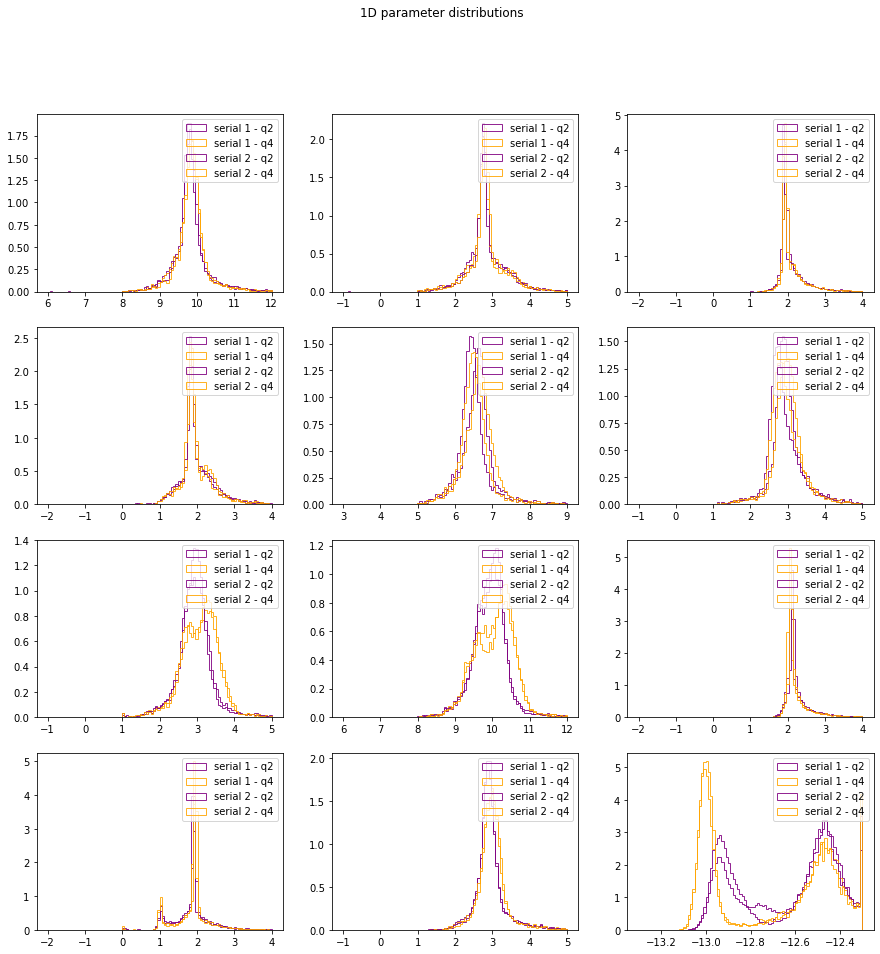

In [ ]:
n_bins = 100
fig, axs = plt.subplots(4,3, figsize=(15,15))


### shuffled samples
n_ensembles = 6
n_shuffles = 1000
k=-1
tmp = sample_list[k]
for i, ax in enumerate(axs.flatten()):  # for each subplot figure (parameter)
    s = np.array(0.0)
    n = np.array(0.0)
    for j in range(n_ensembles):
        D_tmp = np.transpose(tmp[j])[i]
        s = s + D_tmp
    avg = s/n_ensembles 
    ax.hist(avg, n_bins, histtype="step", density=True, alpha=0.85, color='red', label='avg. last shuffle stage')   # plot parameter histogram
    ax.legend()
    ax.set_title(f'p_{i} distribution')
    ax.set_xlim(p_bounds[i][0], p_bounds[i][1])
    ax.axvline(p_true[i], 0,1, ls='--', color='k')




for i, ax in enumerate(axs.flat):
    data_i = df1.iloc[:, i]
    data_qtr = np.array_split(data_i, 4)  # note uneven split
    ax.hist(data_qtr[1], density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color='purple', label='serial 1 - q2')
    ax.hist(data_qtr[3], density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color='orange', label='serial 1 - q4')


    data_i2 = df2.iloc[:, i]
    data_qtr2 = np.array_split(data_i2, 4)  # note uneven split
    ax.hist(data_qtr2[1], density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color='purple', label='serial 2 - q2')
    ax.hist(data_qtr2[3], density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.85, histtype='step', color='orange', label='serial 2 - q4')
    ax.legend()
plt.tight_layout()
plt.suptitle(f"1D parameter distributions")